# Equações diferenciais ordinárias

Os métodos de Euler e Euler–Cromer são práticos para escrever rapidamente um programa que calcula a solução de uma EDO. Vamos aprender sobre a família de Métodos de Runge–Kutta, que são mais eficientes e preciso do que os métodos que já aprendemos.

## Métodos de Runge–Kutta

### Melhorando o método de Euler

Depois do método de Euler–Cromer, ainda é possível melhorar o método de Euler, usando os métodos da família Runge–Kutta. Lembrando, queremos encontrar a solução $x(t)$ da EDO

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = f(x, t).
$$

A solução exata pode ser encontrada, em princípio, calculando a integral no tempo,

\begin{align}
\int_{t_j}^{t_{j+1}} \frac{\mathrm{d}x}{\mathrm{d}t}\,\mathrm{d}t &= \int_{t_j}^{t_{j+1}} f\left( x(t), t \right)\,\mathrm{d}t \\
\int_{x_j}^{x_{j+1}}\,\mathrm{d}x &= \int_{t_{j-1}}^{t_j} f\left( x(t), t \right)\,\mathrm{d}t \\
x_{j+1} - x_j &= \int_{t_j}^{t_{j+1}} f\left( x(t), t \right)\,\mathrm{d}t \\
x_{j+1} & = x_j + \int_{t_j}^{t_{j+1}} f\left( x(t), t \right)\,\mathrm{d}t.
\end{align}

Logicamente, não conseguimos resolver essa integral, pois $x(t)$ está no integrando. Mas, podemos tentar calcular essa integral de forma aproximada, usando a regra retangular. Neste caso, aproximamos a função $f(x, t)$ como uma constante $f(x(t_j), t_j)$ dentro do intervalo de integração. Note que $x(t_j) = x_j$, assim

\begin{align}
x_{j+1} &\cong x_j + \int_{t_j}^{t_{j+1}} f\left( x_j, t_j \right)\,\mathrm{d}t \\
&\cong x_j + f\left( x_j, t_j \right) \int_{t_j}^{t_{j+1}} \,\mathrm{d}t \\
&\cong x_j + f\left( x_j, t_j \right) (t_{j+1} - t_j) \\
&\cong x_j + h\,f\left( x_j, t_j \right),
\end{align}

lembrando que o intervalo entre os instantes de tempo é $h = t_j - t_{j-1}$. O resultado é o método de Euler, na sua forma mais simples!

Podemos tentar refinar a integral, usando o método do trapézio, que resulta em

\begin{align}
x_{j+1} &\cong x_j + \frac{h}{2} \left( f\left( x_j, t_j \right) + f\left( x(t_{j+1}), t_{j+1} \right) \right) \\
&\cong x_j + \frac{h}{2} \left( f\left( x_j, t_j \right) + f\left( x_{j+1}, t_{j+1} \right) \right).
\end{align}

Aqui temos um problema, precisamo de $x_{j+1}$ para calcular $x_{j+1}$. Poderíamos tentar resolver essa equação não-linear com os métodos que já aprendemos. Chamamos isso de *método implícito*.

Por outro lado, se queremos um método *explícito*, baseado apenas nos passos anteriores, podemos sair dessa sinuca de bico calculando uma primeira aproximação para $x_{j+1}$ usando o método de Euler (que chamaremos de $\tilde{x}_{j+1}$), para usá-la como entrada para o novo método.

\begin{align}
\tilde{x}_{j+1} &= x_j + h \,f\left( x_j, t_j \right) \\
x_{j+1} &\cong x_j + \frac{h}{2} \left( f\left( x_j, t_j \right) + f\left( \tilde{x}_{j+1}, t_{j+1} \right) \right).
\end{align}

Vamos rescrever essas equações para padronizar a notação,

\begin{align}
k_1 &= h \,f\left( x_j, t_j \right) \\
k_2 &= h \,f\left( x_j + k_1, t_{j+1} \right) \\
x_{j+1} &\cong x_j + \frac{1}{2} \left( k_1 + k_2 \right).
\end{align}

Na prática, isso significa que temos um incremento $k_1$  que aproxima $x_j$ do próximo passo, o qual usamos para calcular um outro candidato a incremento $k_2$ com base em $k_1$. O incremento final é a média entre eles. Esse é o método de Runge–Kutta de segunda ordem com dois estágios, ou simplesmente RK2.

#### Exercício 1

Resolva novamente o exemplo do início do texto, a EDO

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = - x^3 + \sin t.
$$

Obtenha a solução com $x=1$ em $t=0$ até $t=20$. Compare o resultado usando o métodos RK2 e usando o método de Euler. Use um número diferente de passos para cada método, para poder comparar a sua precisão.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

Text(0, 0.5, '$x(t)$')

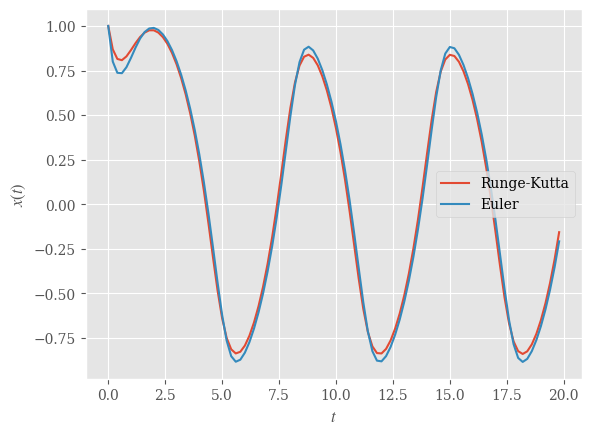

In [23]:
x0 = 1
t0 = 0
tf = 20
N = 100
h = (tf - t0)/N 

def f(x,t):
    return -(x**3) + np.sin(t)

x = np.zeros(N)
t = np.zeros(N)
x_euler = np.zeros(N)
t_euler = np.zeros(N)
t[0] = t0
x[0] = x0
x_euler[0] = x0
t_euler[0] = t0

for j in range(N-1):
    t_euler[j+1] = t_euler[0] + h*(j+1)
    x_euler[j+1] = x_euler[j] + h*f(x_euler[j],t_euler[j])
    t[j+1] = t[0] + h*(j+1)
    k1 = h*f(x[j],t[j])
    k2 = h*f(x[j] + k1,t[j+1])
    x[j+1] = x[j] + 0.5*(k1+k2)


fig, ax = plt.subplots(1,1)

ax.plot(t,x, label = "Runge-Kutta")
ax.plot(t_euler,x_euler, label = "Euler")
ax.legend()
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")

Este é o método mais usado para obter soluções numéricas de EDOs. É necessário calcular $f(x)$ 2 vezes a cada iteração, porém o RK2 é preciso até termos de ordem $h^2$, com erros da ordem de $h^3$. Na prática, isto significa que o RK2 é muito mais preciso e eficiente do que o método de Euler, que tem erros da ordem de $h^2$.

Assim, em geral podemos usar o método RK2 com $h$ muito maiores (isto é, menos passos), e ainda assim ter resultados tão bons quanto os do método de Euler.

## EDOs com mais do que uma variável

Na semana passada vimos um jeito simples de resolver problemas de dinâmica, onde temos duas EDOs acopladas, e achamos uma forma simples e *ad hoc* de resolvê-las com o método de Euler–Cromer. Podemos fazer o mesmo para o método de Runge–Kutta, porém vamos ser mais gerais, e resolver para quaisquer $M$ EDOs acopladas.

Considere primeiro as duas equações

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= xy - y \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= y - xy + \sin^2 \omega t.
\end{align}

Nestas equações, $x$ e $y$ são variáveis que dependem somente de $t$, mas não dependem uma da outra. Isto é, as soluções das EDOs são as funções $x(t)$ e $y(t)$, e somente $t$ é a variável independente (por isso as derivadas são completas, e não parciais). Mesmo sendo $x$ e $y$ independentes, elas estão acopladas pelas EDOs, tal que a derivada de $x$ pode depender de $y$ e vice-versa.

Uma boa parte das EDOs acopladas pode ser separada, e expressa da forma

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= f_x(x, y, t) \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= f_y(x, y, t),
\end{align}

onde $f_x$ e $f_y$ são funções gerais e possivelmente não-lineares de $x$, $y$, e $t$. Em situações onde esta separação não é possível, precisamos de outros métodos para resolver as EDOs, como métodos de relaxação. Veja a seção 8.6 do livro Computational Physics de Mark Newman.

Repare que, assim como um sistema linear, precisamos que o número de EDOs acopladas seja igual ao número de variáveis dependentes. Para um número arbitrário de variáveis e EDOs, podemos adotar uma notação vetorial, com $\vec{r} = (x, y, \ldots)$ e $\vec{f} = \left(f_x(\vec{r}, t), f_y(\vec{r}, t), \ldots \right)$, e escrever simplesmente


\begin{align}
\frac{\mathrm{d}\vec{r}}{\mathrm{d}t} &= \vec{f}(\vec{r}, t).
\end{align}

Na prática, $\vec{f}$ é uma função que recebe um vetor $\vec{r}$ com as $M$ variáveis dependentes, e retorna um vetor do mesmo tamanho com o resultado. Isto é muito fácil de programar em Python usando numpy arrays bidimensionais (isto é, matrizes). O método de Euler segue facilmente fazendo o mesmo raciocínio da semana passada, mas usando vetores. Fazendo a expansão de Taylor do vetor $\vec{r}$,

\begin{align}
\vec{r}(t+h) &= \vec{r}(t) + h \frac{\mathrm{d}\vec{r}}{\mathrm{d}t} + \frac{1}{2} h^2\frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2} + \ldots \\
\vec{r}(t+h) &\cong \vec{r}(t) + h \vec{f}.
\end{align}

Do mesmo jeito, o método de Runge–Kutta pode ser generalizado para vetores, ficando da forma

\begin{align}
\vec{k_1} &= h \vec{f}(\vec{r}, t) \\
\vec{k_2} &= h \vec{f}(\vec{r} + \vec{k_1}, t + h) \\
\vec{r}(t+h) &= \vec{r}(t) + \frac 1 2 (\vec{k_1} + \vec{k_2}).
\end{align}

Neste caso, os valores auxiliares $\vec{k_1}$ e $\vec{k_2}$ são vetores de mesmas dimensões que $\vec{r}$, com $M$ componentes.

#### Exemplo

Vamos resolver as equações dadas como exemplo acima,

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= xy - x \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= y - xy + \sin^2 \omega t,
\end{align}

com $\omega = 1$, de $t = 0$ até $t = 10$ em $N = 1000$ passos. Como condições iniciais, tome $x = 1.5$ e $y = 1$ em $t=0$.

Aqui temos as variáveis dependentes $x$ e $y$, $M = 2$. Vamos tomar alguns cuidados na hora de decidir a representação de $\vec{f}$ e $\vec{r}$, e veremos que o programa fica virtualmente idêntico ao que já fizemos acima.

Uma representação possível é usar arrays de 2 elementos para representar $\vec{r} = (x, y)$. Neste caso, precisamos de um array de $N$ elementos para guardar a solução, onde cada elemento é também um array de $M$ elementos. Isso pode ser feito usando um array bidimensional, que é como uma matriz $N \times M$.

Vamos aproveitar e já definir as condições iniciais e o passo de tempo.

In [24]:
N = 100
t0 = 0
tf = 10

# Passo de tempo
h = (tf - t0) / N

# Instantes de tempo
t = np.arange(t0, tf, h)

# (N, M) é uma tupla, que indica um array multidimensional.
# A ordem importa!
M = 2
dimensões = (N, M)
r = np.zeros((dimensões))

# Condição inicial
r[0, :] = [1.5, 1]
# igualmente correto
#r[0] = [1.5, 1]

Em seguida, vamos definir a função Python que calcula $\vec{f}(\vec{r}, t)$.

In [29]:
def f(r, t):
    # r tem 2 elementos.
    # "desempacotando" as variáveis independentes
    x = r[0]
    y = r[1]
    
    # Calculando as duas funções
    f_x = x * y - x
    f_y = y - x * y + np.sin(t) ** 2
    
    # Retornando um array de 2 elementos.
    return np.array([f_x, f_y])

É interessante verificar como ficam os cálculos intermediários usando agora valores vetoriais.

In [30]:
print(f'Em t = {t0}, as variáveis são {r[0]}')

drdt = f(r[0], t0)
print(f'em t = {t0}, dr/dt = {drdt}')

Em t = 0, as variáveis são [1.5 1. ]
em t = 0, dr/dt = [ 0.  -0.5]


In [31]:
k1 = h * f(r[0], t0)
k2 = h * f(r[0] + k1, t[1])
print(f'k1 = {k1}')
print(f'k2 = {k2}')
print(f'r_1 = {r[0] + 0.5 * (k1 + k2)}')

k1 = [ 0.   -0.05]
k2 = [-0.0075     -0.04650333]
r_1 = [1.49625    0.95174834]


Podemos ver que, quando definimos as variáveis e as funções desta forma, o código pode ser exatamente o mesmo usado anteriormente.

In [32]:
for j in range(N - 1):
    k1 = h * f(r[j], t[j])
    k2 = h * f(r[j] + k1, t[j + 1])
    r[j + 1] = r[j] + 0.5 * (k1 + k2)

# Separar o array r nas variáveis
x = r[:, 0]
y = r[:, 1]

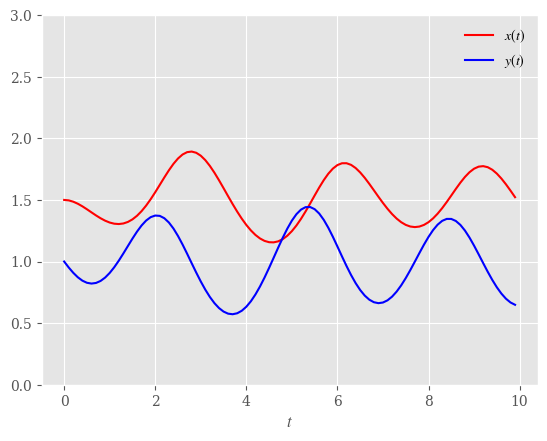

In [33]:
fig, ax = plt.subplots()
ax.plot(t, x, 'r-', label=f'$x(t)$')
ax.plot(t, y, 'b-', label=f'$y(t)$')
ax.set_xlabel('$t$')
ax.set_ylim(0.0, 3.0)
ax.legend(frameon=False, loc='upper right')
plt.show()

#### Exercício 2

Calcule a órbita aproximada, em duas dimensões, de um planeta ao redor do Sol, supondo que ele tem uma massa muito menor que a solar. Considere a força gravitacional

\begin{align}
\vec{F} &= \frac{GMm}{r^3} \vec{r} \\
&= \frac{GMm}{r^3} x \hat{i} + \frac{GMm}{r^3} y \hat{j},
\end{align}

com $r = \sqrt{x^2 + y^2}$, $M$ é a massa do Sol e $m$ é a massa do planeta. Neste caso as equações de movimento ficam

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= v_x \\
\frac{\mathrm{d}v_x}{\mathrm{d}t} &=\frac{GM}{r^3} x \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= v_y \\
\frac{\mathrm{d}v_y}{\mathrm{d}t} &=\frac{GM}{r^3} y \\
\end{align}

Resolva o problema em unidades mais convenientes, com distâncias em unidades astronômicas e tempo em anos. Nessas unidades, $G = 1.9853516 \times 10^{-29}\,\mathrm{au}^3\,\mathrm{kg}^{-1}\,\mathrm{a}^{-2}$. Use como massa do Sol $M_\odot = 1.98847 \times 10^{30}\,\mathrm{kg}$. Desenhe o gráfico da órbita.

In [28]:
Ms = 1.98847e30
G = 1.9853516e-29
GM = G*Ms

t0 = 0
tf = 1
N = 1000
h = 1/365

M = 4
dim = (N,M)
r = np.zeros(dim)
t = np.zeros(N)

r[0] = [0,1,2*np.pi,0]
t[0] = t0

def f(r):
     
    x,y,vx,vy = r

    R = np.sqrt(x**2 + y**2)

    dx = vx
    dy = vy
    fvx = -GM*x/(R**3)
    fvy = -GM*y/(R**3)

    return np.array([dx,dy,fvx,fvy])
    
for j in range(N-1):
    t[j+1] = (j+1) * h
    k1 = h * f(r[j])
    k2 = h * f(r[j] + k1)
    r[j+1] = r[j] + 0.5 * (k2+k1)


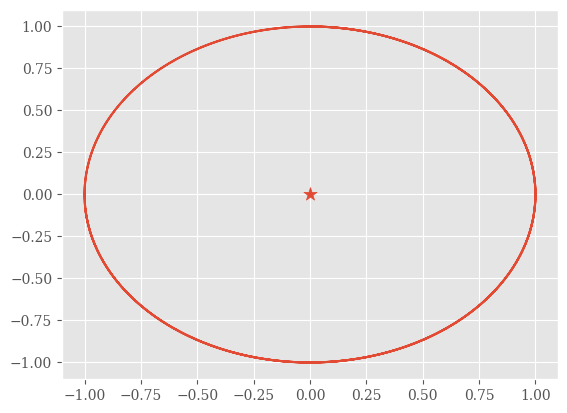

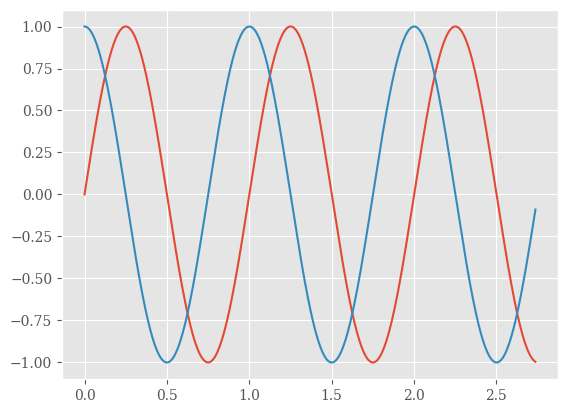

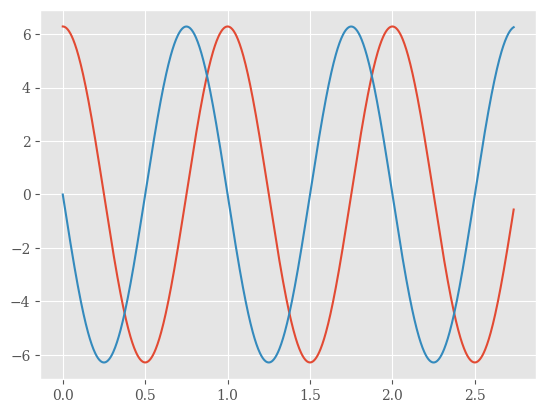

In [31]:
fig , ax = plt.subplots(1,1)
x = r[:,0]
y = r[:,1]
ax.plot(x,y)
ax.scatter([0],[0], marker = "*", s=100)

fig, ax = plt.subplots(1,1)
ax.plot(t,x)
ax.plot(t,y)

fig, ax = plt.subplots(1,1)
ax.plot(t,r[:,2])
ax.plot(t,r[:,3])